In [1]:
import numpy as np #<--- Use for n < 200
#import cupy as np #<--- Use for n >= 200 with a GPU runtime
import math
import matplotlib.pyplot as plt
np.set_printoptions(threshold=np.inf)

As fast as it can get on a CPU. Can be sped up more only by using GPU

In [2]:
#Function to generate new subsets
def add_subarray(A, r, sub=None):
    indices = np.random.choice(len(A), size=r, replace=False)
    if sub is None:
        sub = np.zeros_like(A)
        sub[indices] = 1
        return sub
    else:
        new = np.zeros_like(A)
        new[indices] = 1
        return np.vstack((sub, new))

#Function to find intersections
def vectorized_intersections(sub, t, vis=False):
    out = sub @ sub.T
    #print(sub.shape)
    
    if vis:
        n_memories = np.sum(sub, axis=0).flatten()
        #print(n_memories)
        print((out>=t).astype(int))
        print("#----------------------#")

    if out.shape == ():
        self_inters = 1
    else:
        self_inters = out.shape[0]
    return (np.sum(out >= t) - self_inters)

#Analytical Bound for the Mean Capacity
def analytical_capacity(n,r,T,k):
    t = math.ceil(r / k)
    sum = 0
    for i in range(t,r+1):
        sum += (math.comb(r,i) * math.comb(n-r,r-i))/math.comb(n,r)

    return math.floor(T/sum + 1)

#Simulation for Capacity
def simulated_capacity(n,r,T,k,H,verbose=False, vis=False):
    A = np.arange(1,n+1, dtype=np.float32)
    t = math.ceil(r / k)
    inter = 0
    sub = None
    while True:
        sub = add_subarray(A, r, sub)
        if sub.shape[0] % H == 0:
            inter = vectorized_intersections(sub, t, vis)
            if verbose:
                print("Expected intersections per sublist: ", inter/sub.shape[0])
            if inter/sub.shape[0] >= T:
                if verbose:
                    print(str(r)+"-sublist capacity of "+str(n)+": "+str(sub.shape[0]-H))
                return sub.shape[0]

#Run the simulated multiple times to get closer to the true mean
def mean_simulated_capacity(n,r,T,k,H,n_trials,verbose=False, vis=False):
    results = []
    for _ in range(n_trials):
        results.append(simulated_capacity(n,r,T,k,H,verbose,vis))

    # return np.mean(results), np.std(results)
    return sum(results)/len(results)

In [3]:
#INPUT PARAMS-------------------------
n = 100
r = 40
T = 0.1
k = 2
#-------------------------------------

In [4]:
#Get the analytical capacity
analytical_capacity(n,r,T,k)

2

In [5]:
#Take mean of simulations
#Simulation Params-------------
n_trials = 1
H = 50 #<--- increase for larger n
#------------------------------
mean_simulated_capacity(n,r,T,k,H,n_trials,vis=False)

50.0

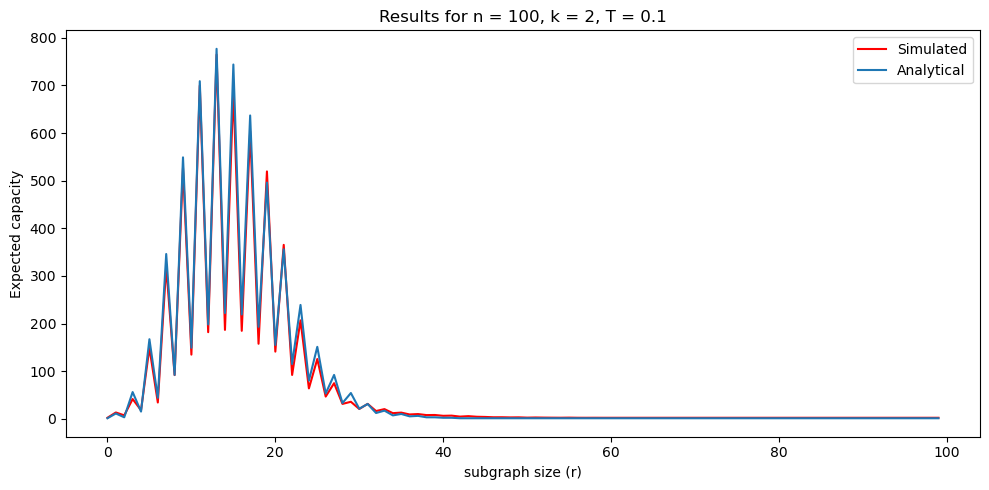

In [6]:
#capacity vs r for fixed n
#INPUT PARAMS-------------------------
n = 100
T = 0.1
k = 2
H = 1
#-------------------------------------
analytical_results = []
x = range(0,n)
for r_iter in x:
    analytical_results.append(analytical_capacity(n,r_iter,T,k))

simulated_results = []
for r_iter in x:
    simulated_results.append(mean_simulated_capacity(n,r_iter,T,k,H,n_trials=20))

plt.figure(figsize = (10,5))

plt.plot(x, simulated_results, color='red', label='Simulated')
plt.plot(x, analytical_results, label='Analytical')
plt.title("Results" + " for n = " + str(n) + ", k = " + str(k) + ", T = " + str(T))
plt.xlabel('subgraph size (r)')
plt.ylabel('Expected capacity')

# ax2.set_title("Simulated Results"+" for n = " + str(n) + ", k = " + str(k) + ", T = " + str(T))
# ax2.set_xlabel('subgraph size (r)')
# ax2.set_ylabel('Expected capacity')
plt.legend()
plt.tight_layout()
plt.show()

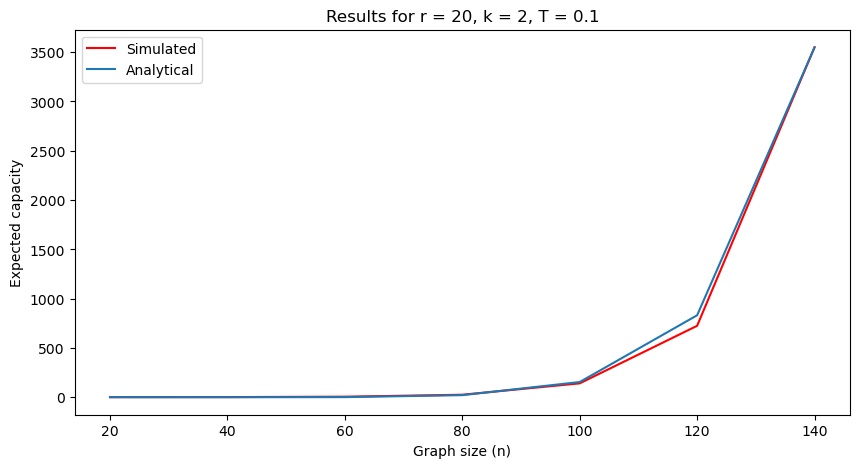

In [7]:
#capacity vs n for fixed r
#INPUT PARAMS-------------------------
r = 20
T = 0.1
k = 2
H = 1
#-------------------------------------
x = range(r,8*r, r)
analytical_results = []
for n_iter in x:
    analytical_results.append(analytical_capacity(n_iter,r,T,k))

simulated_results = []
for n_iter in x:
    simulated_results.append(mean_simulated_capacity(n_iter,r,T,k,H,n_trials=10))

plt.figure(figsize = (10,5))
plt.plot(x, simulated_results, color='red', label='Simulated')
plt.plot(x, analytical_results,  label='Analytical')
plt.title("Results" + " for r = " + str(r) + ", k = " + str(k) + ", T = " + str(T))
plt.xlabel('Graph size (n)')
plt.ylabel('Expected capacity')
plt.legend()
plt.show()

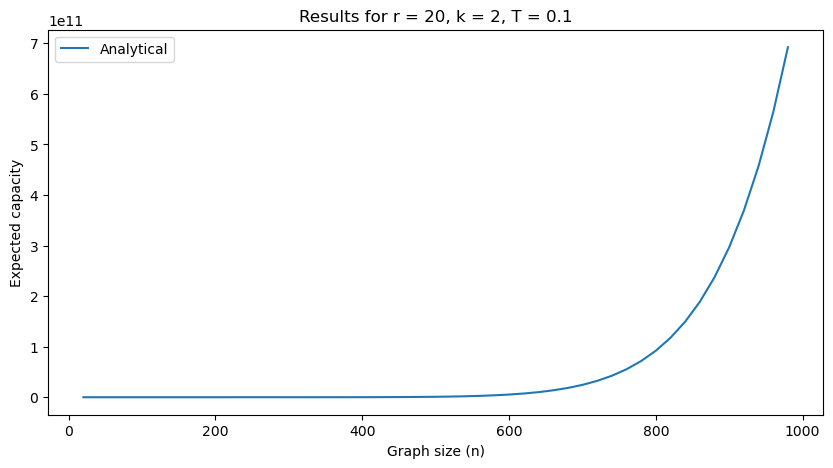

In [8]:
#capacity vs n for fixed r
#INPUT PARAMS-------------------------
r = 20
T = 0.1
k = 2
H = 1
#-------------------------------------
x = range(r,50*r, r)
analytical_results = []
for n_iter in x:
    analytical_results.append(analytical_capacity(n_iter,r,T,k))

plt.figure(figsize = (10,5))
plt.plot(x, analytical_results,  label='Analytical')
plt.title("Results" + " for r = " + str(r) + ", k = " + str(k) + ", T = " + str(T))
plt.xlabel('Graph size (n)')
plt.ylabel('Expected capacity')
plt.legend()
plt.show()